In [1]:
from tqst_class import *

In [ ]:
tomo = tQST(4)
nq = tomo.get_num_of_qubits()
print(nq)

diagonal = np.zeros(nq**2)
diagonal[0]=1/4
diagonal[5]=1/4
diagonal[10]=1/4
diagonal[15]=1/4
# diagonal=diagonal/np.sum(diagonal)
tomo.set_diagonal_counts(diagonal)
tdict = tomo.get_diagonal_counts()

gini = dmt.gini_index(diagonal)
threshold = tomo.set_threshold(gini)


offd_projs = tomo.get_projs_to_measure()
print("nb of measurement necessary: ", np.shape(offd_projs))

Number of qubits set to 4.
4
Diagonal counts are now set.
The threshold is now set to 0.05.
Ideal projectors to measure: 
These are the projectors you have to measure, given the provided diagonal and threshold.
+----------------+-----------+
| Matrix element | Projector |
+----------------+-----------+
|  (0, 5, 'r')   |   |HDHD>  |
|  (0, 5, 'i')   |   |HDHR>  |
|  (0, 10, 'r')  |   |DHDH>  |
|  (0, 10, 'i')  |   |DHRH>  |
|  (0, 15, 'r')  |   |DDDD>  |
|  (0, 15, 'i')  |   |DDDR>  |
|  (5, 10, 'r')  |   |RRRR>  |
|  (5, 10, 'i')  |   |RRRD>  |
|  (5, 15, 'r')  |   |DVDV>  |
|  (5, 15, 'i')  |   |DVRV>  |
| (10, 15, 'r')  |   |VDVD>  |
| (10, 15, 'i')  |   |VDVR>  |
+----------------+-----------+
nb of measurement necessary:  (12,)


1. dare i veri valori della diagonale
2. definire i proiettori reali
3. dare i counts misurati per ciascun proiettore

Diagonal counts are now set.
HDHD
[0.5+0.j 0.5+0.j 0.5+0.j 0.5+0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j
 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j]
[[ 1.  +0.j    0.  +0.j    0.  +0.j    0.  +0.j    0.  +0.j    0.  +0.j
   0.  +0.j    0.  +0.j    0.  +0.j    0.  +0.j    0.  +0.j    0.  +0.j
   0.  +0.j    0.  +0.j    0.  +0.j    0.  +0.j  ]
 [ 0.  +0.j    1.  +0.j    0.  +0.j    0.  +0.j    0.  +0.j    0.  +0.j
   0.  +0.j    0.  +0.j    0.  +0.j    0.  +0.j    0.  +0.j    0.  +0.j
   0.  +0.j    0.  +0.j    0.  +0.j    0.  +0.j  ]
 [ 0.  +0.j    0.  +0.j    1.  +0.j    0.  +0.j    0.  +0.j    0.  +0.j
   0.  +0.j    0.  +0.j    0.  +0.j    0.  +0.j    0.  +0.j    0.  +0.j
   0.  +0.j    0.  +0.j    0.  +0.j    0.  +0.j  ]
 [ 0.  +0.j    0.  +0.j    0.  +0.j    1.  +0.j    0.  +0.j    0.  +0.j
   0.  +0.j    0.  +0.j    0.  +0.j    0.  +0.j    0.  +0.j    0.  +0.j
   0.  +0.j    0.  +0.j    0.  +0.j    0.  +0.j  ]
 [ 0.  +0.j    0.  +0.j    0.  +0.j    0.  +0.j    1.  

c:\Users\sc266065\Documents\HyperEntanglement\thresholdqst\density_matrix_tool.py:325: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_zticklabels(z_lbls)


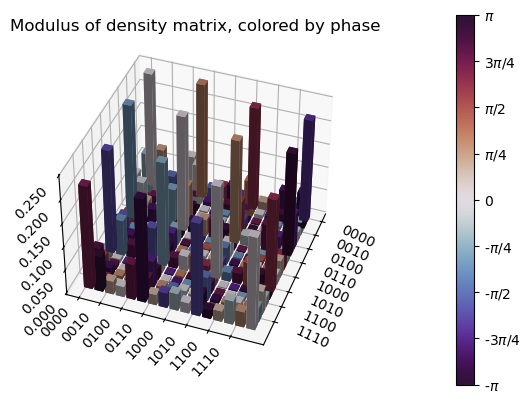

In [11]:
diagonal = np.zeros(nq**2)
diagonal[0]=1/4
diagonal[5]=1/4
diagonal[10]=1/4
diagonal[15]=1/4
tomo.set_diagonal_counts(diagonal)

### SET THE PROJECTORS
print(offd_projs[0])
projs[0]=HDHD
print(projs[0])

##### FIRST WAY #####
# offd_counts = [0.5, 0.25]
offd_counts = np.zeros(len(offd_projs))
offd_counts[0]=0.5
# counts = counts * 1e3

tomo.set_projs_and_counts(offd_projs, offd_counts)
projs, counts = tomo.get_projs_and_counts()
# print(np.shape(projs))
print(projs)
# print(np.shape(counts))
# print(counts)
#####


#### SECOND WAY #####

# proj_to_meas = tomo.get_projectors_to_measure()

# tdict.setdefault('DD', 0.5)
# print(tdict)
# tdict.setdefault('DR', 0.25)

# #print(tdict)

# projs, counts = tomo.read_tomo_dictionary(tdict)
####

tomo.set_density_matrix_model(model_triangular)

rho_rec = tomo.get_density_matrix(projs, counts)

dmt.plot_density_matrix_3D(rho_rec)

In [14]:
def f_HDHD():
    Pr=np.zeros(nq**2)
    Pr[0]=0.5
    Pr[1]=0.5
    Pr[2]=0.5
    Pr[3]=0.5
    
    return Pr

def f_HDHR():
    Pr=np.zeros(nq**2, dtype=np.complex128)
    Pr[0]=0.5
    Pr[1]=0.5j
    Pr[2]=0.5
    Pr[3]=0.5j
    
    return Pr

def f_DHDH():
    Pr=np.zeros(nq**2, dtype=np.complex128)
    Pr[0]=0.5
    Pr[2]=0.5
    Pr[8]=0.5
    Pr[10]=0.5
    
    return Pr

def f_DHRH():
    Pr=np.zeros(nq**2, dtype=np.complex128)
    Pr[0]=0.5
    Pr[2]=0.5j
    Pr[8]=0.5
    Pr[10]=0.5j
    
    return Pr

HDHR=f_HDHR()
print(HDHR)

[0.5+0.j  0. +0.5j 0.5+0.j  0. +0.5j 0. +0.j  0. +0.j  0. +0.j  0. +0.j
 0. +0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j ]


In [9]:
projs[0]=HDHD
print(projs[0])

[0.5+0.j 0.5+0.j 0.5+0.j 0.5+0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j
 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j]


In [37]:
for i in range(len(offd_projs)):
    print(offd_projs[i])
    print(projs[i])


HDHD
[1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
HDHR
[0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
DHDH
[0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
DHRH
[0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
DDDD
[0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
DDDR
[0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
RRRR
[0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
RRRD
[0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
DVDV
[0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j

In [21]:
def W_tb(Cs, Cl, theta_s, theta_l):
    W=np.zeros([2,2], dtype=np.complex128)
    W[0,0]=Cs*np.exp(theta_s *1j)
    W[1,1]=W[0,0]
    W[1,0]=Cl*np.exp(theta_l *1j)

    return W

def W_fb(J0, J1, J_1, theta_0):
    W=np.zeros([2,2], dtype=np.complex128)
    W[0,0]=J0
    W[1,1]=W[0,0]
    W[0,1]=J_1*np.exp(- theta_0 *1j)
    W[1,0]=J1*np.exp(theta_0 *1j)

    return W

W_tb_s=W_tb(1,1,0,np.pi)
print(W_tb_s)

W_fb_s=W_fb(1,1,1,np.pi)
print(W_fb_s)


[[ 1.+0.0000000e+00j  0.+0.0000000e+00j]
 [-1.+1.2246468e-16j  1.+0.0000000e+00j]]
[[ 1.+0.0000000e+00j -1.-1.2246468e-16j]
 [-1.+1.2246468e-16j  1.+0.0000000e+00j]]


Number of qubits set to 3.
999
Diagonal counts are now set.
The threshold is now set to 0.08928571428571429.
These are the projectors you have to measure, given the provided diagonal and threshold.
+----------------+-----------+
| Matrix element | Projector |
+----------------+-----------+
|  (1, 2, 'r')   |   |HRR>   |
|  (1, 2, 'i')   |   |HRD>   |
|  (1, 4, 'r')   |   |RHR>   |
|  (1, 4, 'i')   |   |RHD>   |
|  (2, 4, 'r')   |   |RRH>   |
|  (2, 4, 'i')   |   |RDH>   |
+----------------+-----------+
['HRR', 'HRD', 'RHR', 'RHD', 'RRH', 'RDH']
The model for density matrix reconstruction is now set.
Tomography of [2, 2, 2] using Triangular model with 64 variables
Defaulting to L-BFGS-B method with options {'gtol': 0.0001, 'maxiter': 1000}
The projectors and the corresponding counts are set. Ready to perform QST.


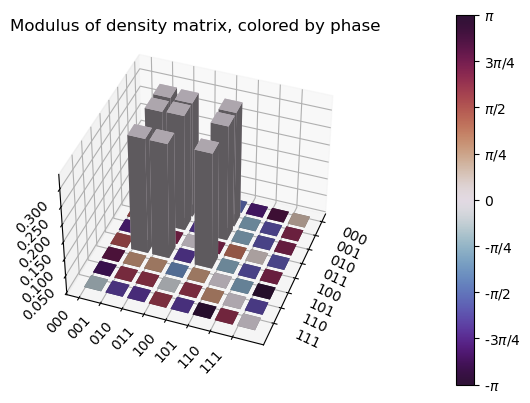

0.9982467474494888


In [8]:
tomo = tQST(3)
nq = tomo.get_num_of_qubits()

diagonal = [0, 333, 333, 0, 333, 0, 0, 0]
N = np.sum(diagonal)
print(N)
tomo.set_diagonal_counts(diagonal)
tdict = tomo.get_diagonal_counts()

threshold = dmt.gini_index(diagonal)
tomo.set_threshold(threshold)

proj_to_meas = tomo.get_projectors_to_measure()
print(proj_to_meas)


# tdict.setdefault('HHH', 0)
# tdict.setdefault('HHV', 333)
# tdict.setdefault('HVH', 333)
# tdict.setdefault('HVV', 0)
# tdict.setdefault('VHH', 333)
# tdict.setdefault('VHV', 0)
# tdict.setdefault('VVH', 0)
# tdict.setdefault('VVV', 0)
tdict.setdefault('HRR', 333/N)
tdict.setdefault('HRD', 167/N)
tdict.setdefault('RHR', 333/N)
tdict.setdefault('RHD', 167/N)
tdict.setdefault('RRH', 333/N)
tdict.setdefault('RDH', 167/N)

projs, counts = tomo.read_tomo_dictionary(tdict)

tomo.set_density_matrix_model(model_triangular)

rho_rec = tomo.get_density_matrix(projs, counts)
dmt.plot_density_matrix_3D(rho_rec)

rho_target = dmt.density_matrix_W(3)

F = dmt.fidelity(rho_rec, rho_target)

print(F)